# Learner's Ability

Concepts:
+ Evaluation of (performance) ability to classify: accuracy, precision, recall, etc.
+ Evaluation of ability to apply knowledge: training versus testing performance.
+ Evaluation of assessment instruments
+ Evaluation of experience
+ The learning curve

Learners (classification):
+ Decision tree (non-linear decision making)
+ Random forest (decision making with a committee)
+ Support vector (linear separation)
+ Naive Bayes (probabilistic prediction)

Datasets
+ iris, admission, cancer, diabetes

### Evaluation of performance
+ Accuracy = (TP + TN) / (TP + FP + TN + FN)

+ Balanced accuracy = 0.5 * (TP/(TP + FN) + TN/(TN + FP)) = 0.5 * (tp-rate + tn-rate)
    * TP + FN = all of data points in class 1.
    * TN + FP = all of data points in class 0.
    
    
+ Precision and recall
    * Precision = TP / (TP + FP) = probability of a positive prediction being correct.
    * Recall = TP / (TP + FN) = probability of class-1 data being correctly predicted.


In [1]:
import pandas
iris = pandas.read_csv('../Datasets/iris.csv')
admission = pandas.read_csv('../Datasets/admission.csv')
cancer = pandas.read_csv('../Datasets/breast-cancer-wisconsin.csv')
diabetes = pandas.read_csv('../Datasets/diabetes.csv')

In [2]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [9]:
cv = ShuffleSplit(n_splits=100, train_size=0.9)

In [10]:
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = SVC(kernel='linear')
model4 = GaussianNB()

In [35]:
def assess_performance(mod, X, y):
#     result = cross_validate(mod, X, y, cv=cv, scoring=['accuracy','precision','recall'])
    result = cross_validate(mod, X, y, cv=cv, scoring=['accuracy'])
    print('Model', mod)
    print('\tAccuracy: {} {}'.format(result['test_accuracy'].mean().round(2), result['test_accuracy'].std().round(2)))
#     print('\tPrecision: {} {}'.format(result['test_precision'].mean().round(2), result['test_precision'].std().round(2)))
#     print('\tRecall: {} {}'.format(result['test_recall'].mean().round(2), result['test_recall'].std().round(2)))    

In [12]:
X = admission.drop(columns=['admit'])
y = admission.admit
assess_performance(model1, X, y)


Model DecisionTreeClassifier()
	Accuracy: 0.62 0.08
	Precision: 0.38 0.13
	Recall: 0.39 0.15


In [15]:
from dtreeviz.trees import dtreeviz

In [22]:
model1.fit(X,y)
viz = dtreeviz(model1, X, y, feature_names=X.columns, fancy=False,
              X=[650,3.5,1])  
viz.view() 

In [19]:
admission.sample()

,admit,gre,gpa,rank
21,1,660,3.63,2


It might not generalize well enough.
+ Some leaf (prediction outcome) has only 1 sample.
+ Having 1 sample defines a rule might be too specific.
+ A long decision path suggests that the decision is too complicated.


In [24]:
model1 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
X = admission.drop(columns=['admit'])
y = admission.admit
assess_performance(model1, X, y)

Model DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
	Accuracy: 0.67 0.08
	Precision: 0.47 0.22
	Recall: 0.26 0.13


In [26]:
model1.fit(X,y)
viz = dtreeviz(model1, X, y, feature_names=X.columns, fancy=False,
              X=[650,3.5,1])  
viz.view() 

#### Random forest

#### Cancer dataset

In [31]:
X = cancer.drop(columns=['id','class'])
y = cancer['class']

In [36]:
assess_performance(model1, X, y)

Model DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
	Accuracy: 0.96 0.02


In [37]:
assess_performance(model2, X, y)


Model RandomForestClassifier(max_depth=5, min_samples_leaf=5)
	Accuracy: 0.97 0.02


In [38]:
cancer['class'].value_counts(1)

2    0.650073
4    0.349927
Name: class, dtype: float64

In [41]:
assess_performance(model3, X, y)

Model SVC(kernel='linear')
	Accuracy: 0.97 0.02


In [40]:
assess_performance(model4, X, y)

Model GaussianNB()
	Accuracy: 0.96 0.02


In [42]:
import lcplot

Cross validator: KFold(n_splits=5, random_state=None, shuffle=True)


<module 'matplotlib.pyplot' from '/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

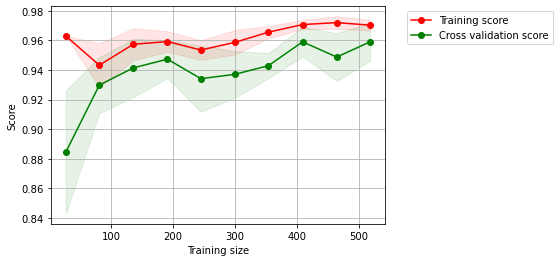

In [47]:
lcplot.plot(model1, X, y)

Cross validator: ShuffleSplit(n_splits=100, random_state=None, test_size=None, train_size=0.9)


<module 'matplotlib.pyplot' from '/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

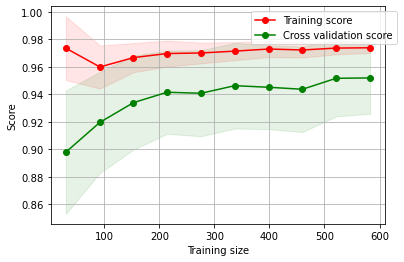

In [48]:
lcplot.plot(model1, X, y, cv=cv)

Observations:
+ Training scores are higher than testing scores.

+ The difference between the training scores and testing scores indicates how much the learner can apply the knowledge.

+ When training size increases, (have more data/experience), performance should be higher.



Cross validator: KFold(n_splits=5, random_state=None, shuffle=True)


<module 'matplotlib.pyplot' from '/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

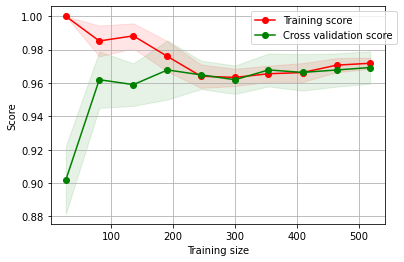

In [49]:
lcplot.plot(model3, X, y)

Cross validator: ShuffleSplit(n_splits=100, random_state=None, test_size=None, train_size=0.9)


<module 'matplotlib.pyplot' from '/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

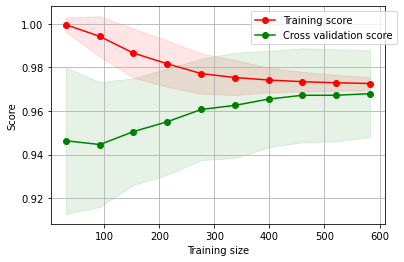

In [50]:
lcplot.plot(model3, X, y, cv=cv)

+ When the assessment instrument is appropriate, learning performance is smoother.

+ Training score decreases training size increases.

+ Testing score increases as training size increases.

+ With increasing data/experience, training becomes harder. But you'll perform better when you see new data.

The learner achieves mastery when the red line (training score) and green line (testing score) converge.

In [51]:
assess_performance(model3, X, y)

Model SVC(kernel='linear')
	Accuracy: 0.97 0.02
